In [1]:
import mne
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

In [40]:
fs = 1200

### FFRs for a single sub

In [6]:
# files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
# for file in files:
#     epochs = mne.read_epochs(file)
#     break

Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4097 matching events found
No baseline correction applied
0 projection items activated


In [71]:
# # Compute grand average
# conditions = list(epochs.event_id.keys())
# evokeds = {c:epochs[c].average() for c in conditions}

# # Plot
# evokeds['50'].plot(titles = '50 Hz')
# evokeds['100'].plot(titles = '100 Hz')
# evokeds['150'].plot(titles = '150 Hz')
# evokeds['200'].plot(titles = '200 Hz')
# evokeds['250'].plot(titles = '250 Hz')
# print('')

### FFRs averaged over all subs

In [9]:
files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
for file in files:
    sub_epochs = mne.read_epochs(file)
    epochs = mne.concatenate_epochs([epochs, sub_epochs])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


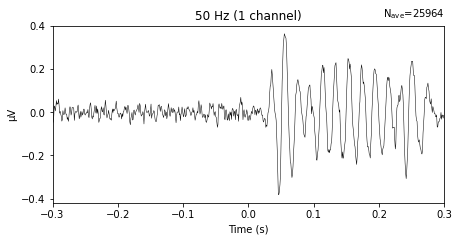

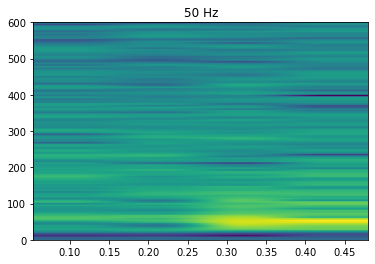

Need more than one channel to make topography for eeg. Disabling interactivity.


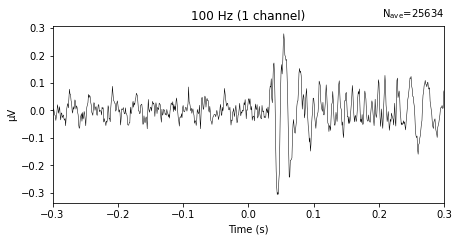

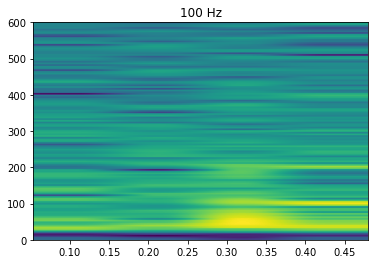

Need more than one channel to make topography for eeg. Disabling interactivity.


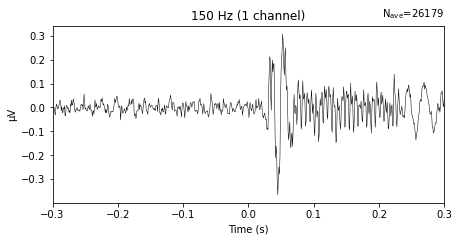

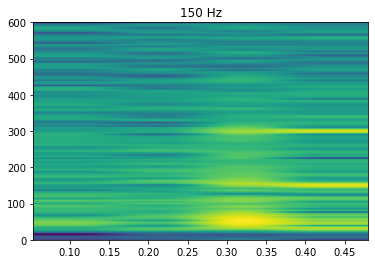

Need more than one channel to make topography for eeg. Disabling interactivity.


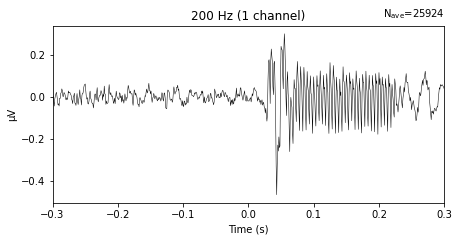

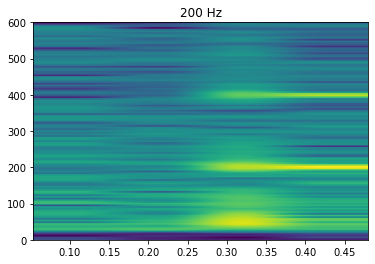

Need more than one channel to make topography for eeg. Disabling interactivity.


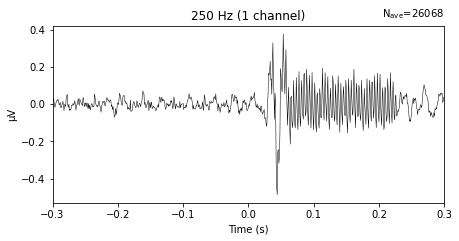

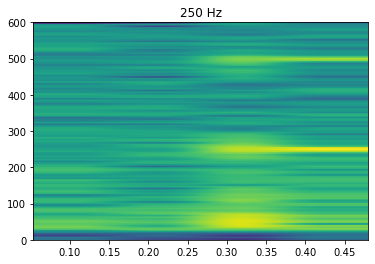

In [74]:
# Compute grand average 
conditions = list(epochs.event_id.keys())
evokeds = {c:epochs[c].average() for c in conditions}

def spectrogram(x, fs, title):
    x = x.flatten()
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
    plt.title(title)
    plt.show()

# Plot
evokeds['50'].plot(titles = '50 Hz')
spectrogram(evokeds['50'].get_data(), fs, title = '50 Hz')
evokeds['100'].plot(titles = '100 Hz')
spectrogram(evokeds['100'].get_data(), fs, title = '100 Hz')
evokeds['150'].plot(titles = '150 Hz')
spectrogram(evokeds['150'].get_data(), fs, title = '150 Hz')
evokeds['200'].plot(titles = '200 Hz')
spectrogram(evokeds['200'].get_data(), fs, title = '200 Hz')
evokeds['250'].plot(titles = '250 Hz')
spectrogram(evokeds['250'].get_data(), fs, title = '250 Hz')
print('')

### FFT

(0.0, 280.0)

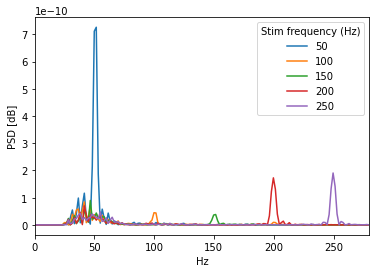

In [70]:
time_step = 1 / fs
freqs = np.fft.fftfreq(x.size, time_step)
idx = np.argsort(freqs)

x = evokeds['50'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "50")

x = evokeds['100'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "100")

x = evokeds['150'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "150")

x = evokeds['200'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "200")

x = evokeds['250'].get_data()
x = x.flatten()
ps = np.abs(np.fft.fft(x))**2
plt.plot(freqs[idx], ps[idx], label = "250")

plt.legend(title = 'Stim frequency (Hz)')
plt.xlabel("Hz")
plt.ylabel("PSD [dB]")
plt.xlim(0, 280)

### Get trial counts

In [62]:
from bids import BIDSLayout
from util.io.iter_BIDSPaths import *
import pandas as pd

In [68]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
fpaths = layout.get(scope = 'preprocess_ffr',
                suffix='epo',
                extension = 'fif.gz',
                return_type = 'filename')

trials_50 = []
trials_100 = []
trials_150 = []
trials_200 = []
trials_250 = []
subs = []
    
for (fpath, sub, task, run) in iter_BIDSPaths(fpaths):
    subs.append(sub)
    sub_epochs = mne.read_epochs(fpath)
    trials_50.append(len(sub_epochs['50']))
    trials_100.append(len(sub_epochs['100']))
    trials_150.append(len(sub_epochs['150']))
    trials_200.append(len(sub_epochs['200']))
    trials_250.append(len(sub_epochs['250']))

In [69]:
# Construct data frame
d = {'sub': subs, 
     '50': trials_50, 
     '100': trials_100, 
     '150': trials_150, 
     '200': trials_200, 
     '250': trials_250}
df = pd.DataFrame(data = d)
df

,sub,50,100,150,200,250
0,3,472,443,495,472,486
1,3,499,478,501,439,471
2,5,845,784,863,842,798
3,6,952,878,943,941,989
4,7,873,846,885,858,818
5,8,839,879,874,854,938
6,9,299,305,315,304,296
7,10,915,921,942,935,939
8,11,940,911,947,966,952
9,12,947,967,979,901,951
